In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [59]:
df = pd.read_csv('bank_transactions_data_2.csv')

In [60]:
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


## Data Cleaning & Preprocessing

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

In [62]:
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000
mean,297.593778,44.673965,119.643312,1.124602,5114.302966
std,291.946243,17.792198,69.963757,0.602662,3900.942499
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.885000,27.000000,63.000000,1.000000,1504.370000
50%,211.140000,45.000000,112.500000,1.000000,4735.510000
75%,414.527500,59.000000,161.000000,1.000000,7678.820000
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


In [63]:
df.isnull().sum()

TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64

In [64]:
df.duplicated().sum()

0

In [65]:
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df['PreviousTransactionDate'] = pd.to_datetime(df['PreviousTransactionDate'])

df[['TransactionDate', 'PreviousTransactionDate']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   TransactionDate          2512 non-null   datetime64[ns]
 1   PreviousTransactionDate  2512 non-null   datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 39.4 KB


## EDA

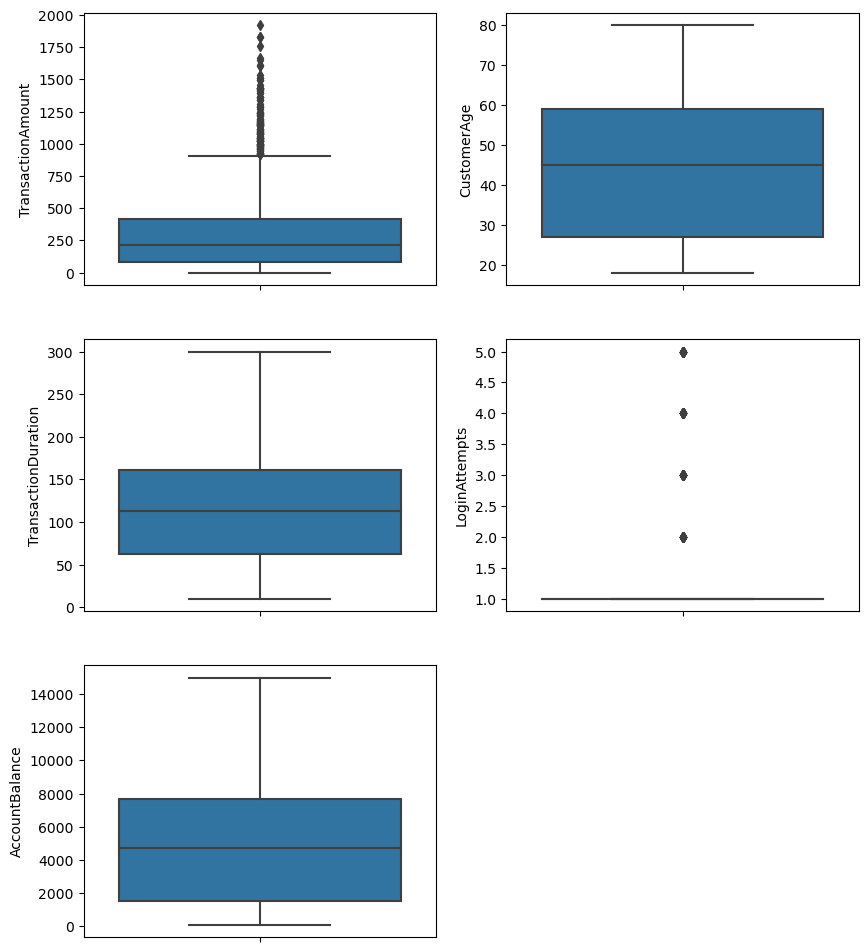

In [66]:
numerical_cols = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']
plt.figure(figsize=(10, 12))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(y=df[col])  
plt.show()

In [67]:
categorical_cols = ['TransactionType', 'Location', 'DeviceID', 'IP Address', 
                    'MerchantID', 'Channel', 'CustomerOccupation']
unique_vals=[]
for col in categorical_cols:
    print(f"Unique values in {col}: {df[col].unique()}")
    unique_vals.append([col,len(df[col].unique())])
    print("\n")
    
print(f"Number of unique values")
for val in unique_vals:
    print(val)

Unique values in TransactionType: ['Debit' 'Credit']


Unique values in Location: ['San Diego' 'Houston' 'Mesa' 'Raleigh' 'Atlanta' 'Oklahoma City'
 'Seattle' 'Indianapolis' 'Detroit' 'Nashville' 'Albuquerque' 'Memphis'
 'Louisville' 'Denver' 'Austin' 'Columbus' 'Los Angeles' 'Las Vegas'
 'Fort Worth' 'Miami' 'Milwaukee' 'Baltimore' 'New York' 'San Francisco'
 'San Jose' 'San Antonio' 'Philadelphia' 'Charlotte' 'Tucson' 'Chicago'
 'Sacramento' 'Kansas City' 'Omaha' 'Virginia Beach' 'Dallas' 'Boston'
 'Jacksonville' 'Phoenix' 'Washington' 'El Paso' 'Colorado Springs'
 'Fresno' 'Portland']


Unique values in DeviceID: ['D000380' 'D000051' 'D000235' 'D000187' 'D000308' 'D000579' 'D000241'
 'D000500' 'D000690' 'D000199' 'D000205' 'D000589' 'D000032' 'D000054'
 'D000309' 'D000466' 'D000671' 'D000432' 'D000530' 'D000039' 'D000152'
 'D000268' 'D000142' 'D000162' 'D000036' 'D000046' 'D000310' 'D000232'
 'D000297' 'D000587' 'D000282' 'D000621' 'D000111' 'D000357' 'D000042'
 'D000250' 'D000448' 

D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf

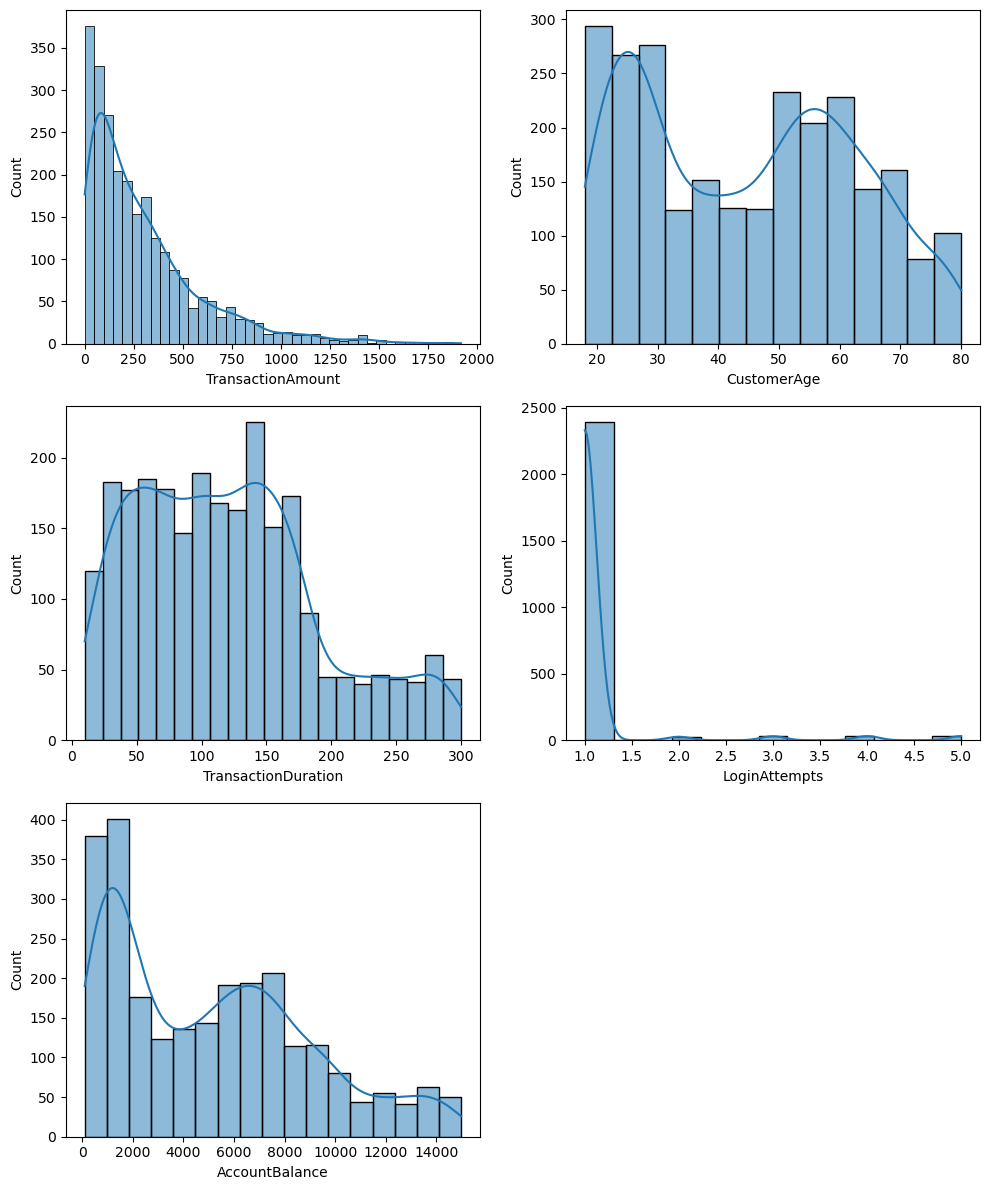

In [68]:
plt.figure(figsize=(10, 12))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 2, i)
    sns.histplot(x=df[col], kde=True)  
plt.tight_layout()
plt.show()

In [69]:
df['Location'].value_counts()

Location
Fort Worth          70
Los Angeles         69
Oklahoma City       68
Charlotte           68
Tucson              67
Philadelphia        67
Omaha               65
Miami               64
Detroit             63
Houston             63
Memphis             63
Denver              62
Kansas City         61
Boston              61
Mesa                61
Atlanta             61
Seattle             61
Colorado Springs    60
Jacksonville        60
Fresno              60
Chicago             60
Austin              59
San Jose            59
Raleigh             59
San Antonio         59
San Diego           59
Indianapolis        58
New York            58
San Francisco       57
Nashville           55
Milwaukee           55
Las Vegas           55
Virginia Beach      55
Phoenix             55
Columbus            54
Sacramento          53
Baltimore           51
Louisville          51
Dallas              49
Washington          48
El Paso             46
Portland            42
Albuquerque         41
Na

D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf

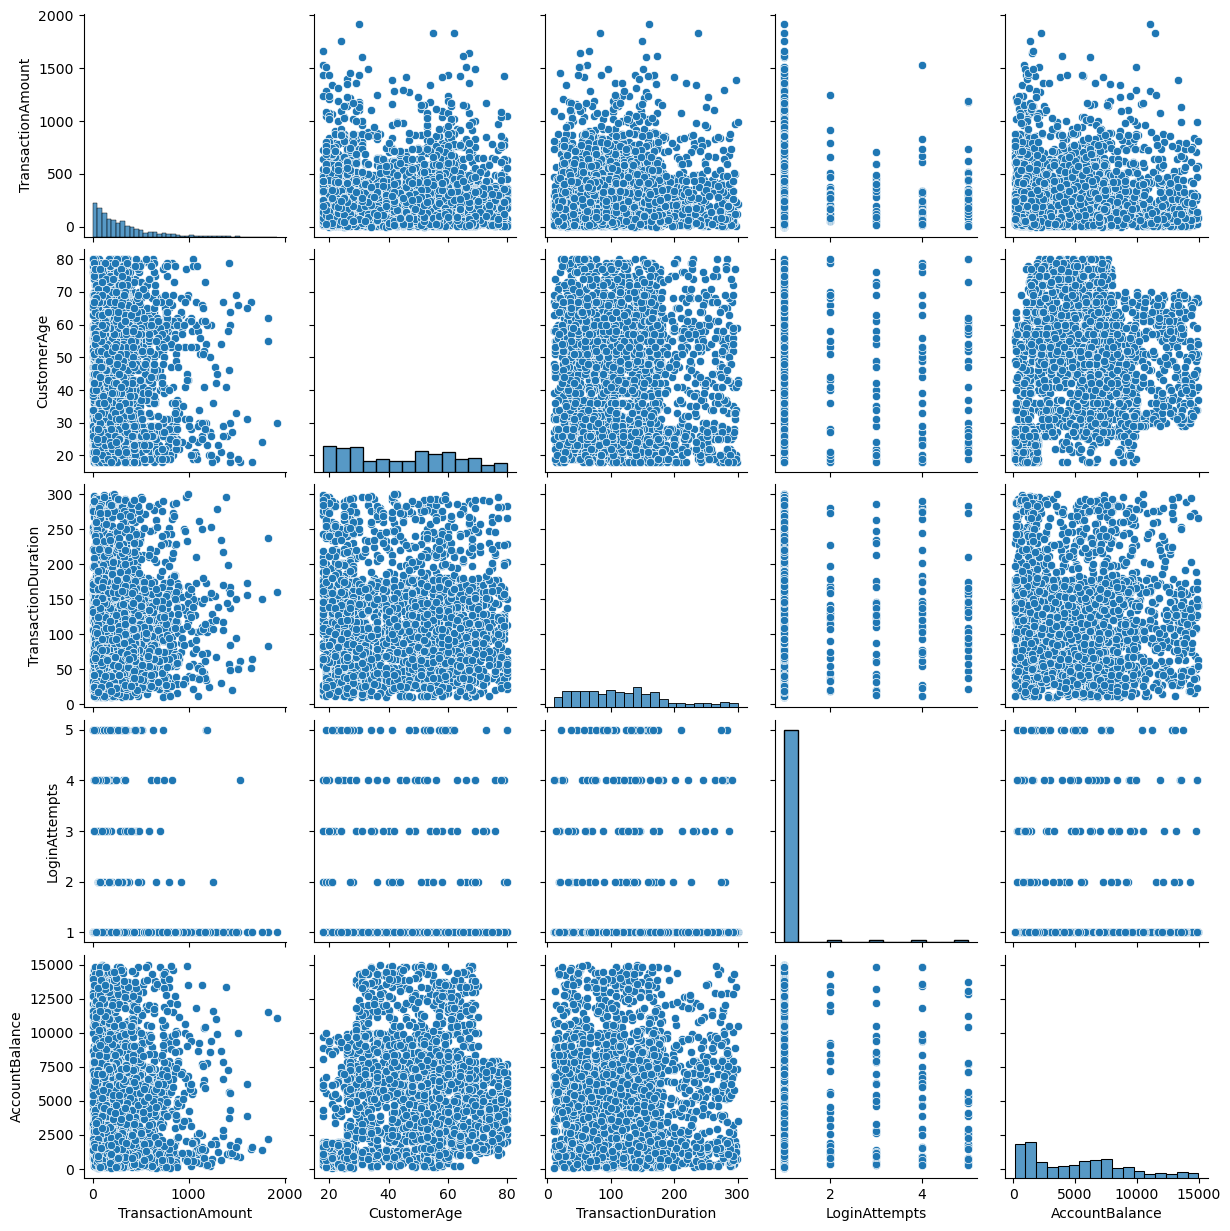

In [70]:
sns.pairplot(df)

<Axes: >

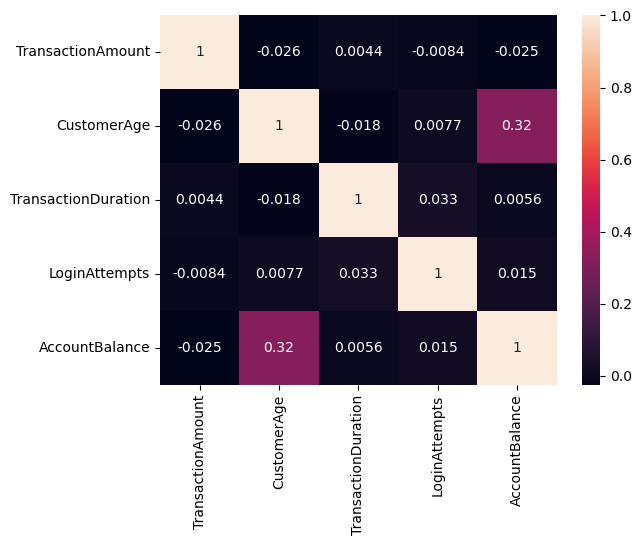

In [71]:
sns.heatmap(df[numerical_cols].corr(), annot=True)

In [72]:
df['TimeSinceLastTransaction'] = (df['TransactionDate'] - df['PreviousTransactionDate']).dt.total_seconds()
df['TransactionHour'] = df['TransactionDate'].dt.hour

In [73]:
df['TransactionFrequency'] = df.groupby('AccountID')['TransactionID'].transform('count')

In [74]:
df['DeviceUsage'] = df.groupby('DeviceID')['AccountID'].transform('count')
df['IPUsage'] = df.groupby('IP Address')['AccountID'].transform('count')

In [75]:
df['MerchantPreference'] = df.groupby(['AccountID', 'MerchantID'])['TransactionID'].transform('count')

In [76]:
# Encode categorical features
df['TransactionType'] = df['TransactionType'].map({'Debit': 0, 'Credit': 1})

# One-hot encode the Channel column
df = pd.get_dummies(df, columns=['Channel'], drop_first=False)

df = pd.get_dummies(df, columns=['CustomerOccupation'], drop_first=False)

df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,CustomerAge,...,DeviceUsage,IPUsage,MerchantPreference,Channel_ATM,Channel_Branch,Channel_Online,CustomerOccupation_Doctor,CustomerOccupation_Engineer,CustomerOccupation_Retired,CustomerOccupation_Student
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,0,San Diego,D000380,162.198.218.92,M015,70,...,6,3,1,True,False,False,True,False,False,False
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,0,Houston,D000051,13.149.61.4,M052,68,...,5,4,1,True,False,False,True,False,False,False
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,0,Mesa,D000235,215.97.143.157,M009,19,...,5,7,1,False,False,True,False,False,False,True
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,0,Raleigh,D000187,200.13.225.150,M002,26,...,6,8,1,False,False,True,False,False,False,True
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,1,Atlanta,D000308,65.164.3.100,M091,26,...,3,4,1,False,False,True,False,False,False,True


## Modelling

In [77]:
X = df[[
    'TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 
    'AccountBalance', 'TimeSinceLastTransaction', 'TransactionHour', 
    'TransactionFrequency', 'DeviceUsage', 'IPUsage', 'MerchantPreference',
    'TransactionType', 'Channel_ATM', 'Channel_Online', 'Channel_Branch', 'CustomerOccupation_Doctor', 'CustomerOccupation_Student', 'CustomerOccupation_Retired', 'CustomerOccupation_Engineer'  
]]

#### Scaling

In [78]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [79]:
from sklearn.ensemble import IsolationForest
import numpy as np
from sklearn.decomposition import PCA

In [80]:
iso_forest = IsolationForest(contamination=0.02, random_state=42)

In [81]:
df['IsolationForest_Pred'] = iso_forest.fit_predict(X_scaled)

# Map results: -1 (Fraud) and 1 (Normal)
df['IsolationForest_Fraud'] = np.where(df['IsolationForest_Pred'] == -1, 'Fraud', 'Not Fraud')

In [82]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df['PCA_1'] = X_pca[:, 0]
df['PCA_2'] = X_pca[:, 1]

In [83]:
# Separate the data for plotting
nonfraud_df = df[df['IsolationForest_Fraud'] == 'Not Fraud']
fraud_df = df[df['IsolationForest_Fraud'] == 'Fraud']

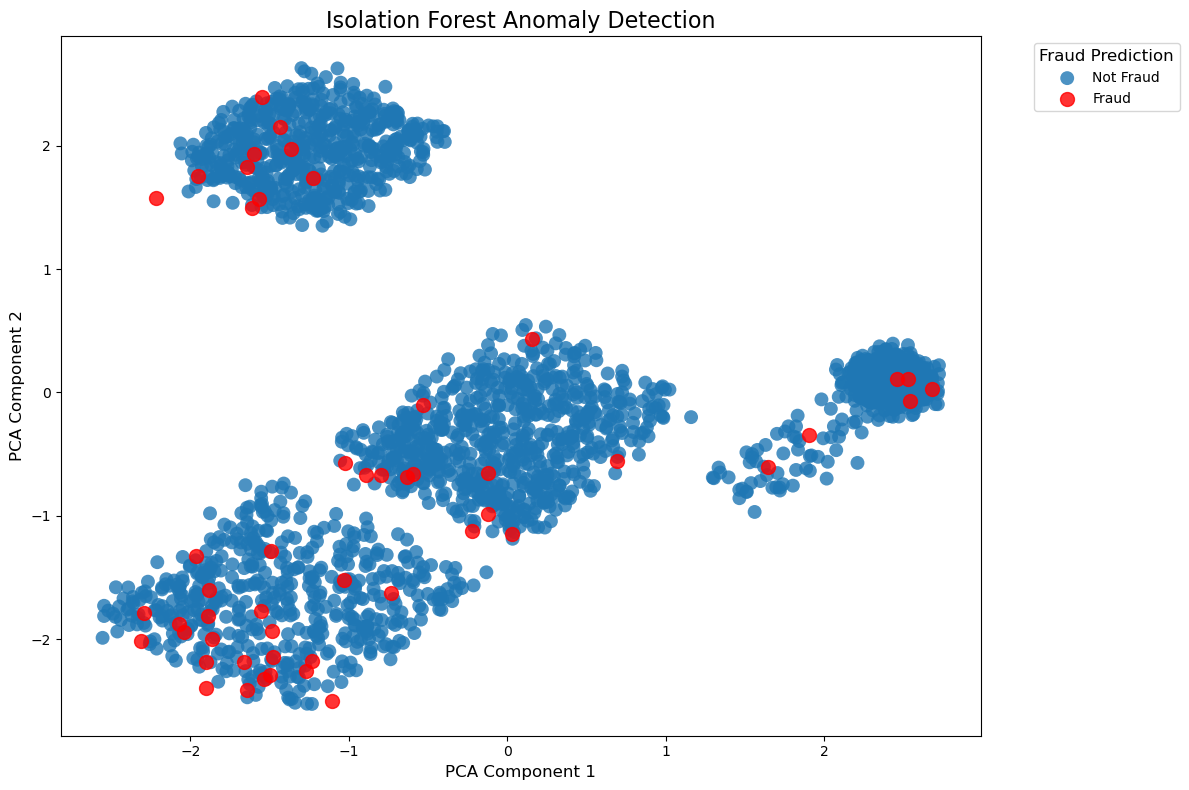

In [84]:
plt.figure(figsize=(12, 8))

# Plot normal (Not Fraud) transactions as borderless circles with LIGHT_GRAY
plt.scatter(nonfraud_df['PCA_1'], nonfraud_df['PCA_2'], s=100, alpha=0.8, marker='o', edgecolor='none', label='Not Fraud')

# Plot fraud transactions as red X markers with no border
plt.scatter(fraud_df['PCA_1'], fraud_df['PCA_2'], color='red', s=100, alpha=0.8, marker='o', edgecolor='red', label='Fraud')

plt.title('Isolation Forest Anomaly Detection', fontsize=16)
plt.xlabel('PCA Component 1', fontsize=12)
plt.ylabel('PCA Component 2', fontsize=12)

# Adjust legend styling to match the theme
plt.legend(title='Fraud Prediction', title_fontsize=12, fontsize=10,
           bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [85]:
frauds = df[df['IsolationForest_Fraud'] == 'Fraud']

print(f"Number of potential frauds detected (Isolation Forest): {len(frauds)}")

Number of potential frauds detected (Isolation Forest): 51
